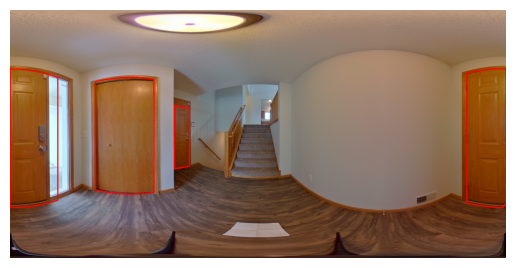

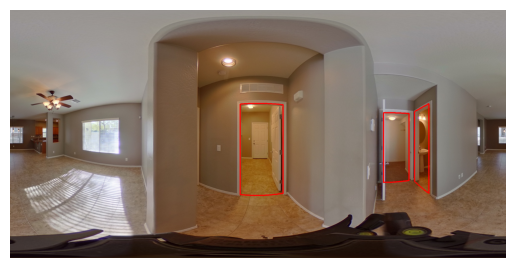

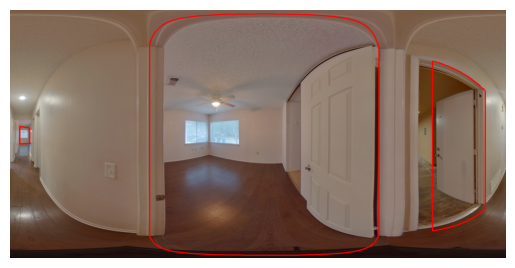

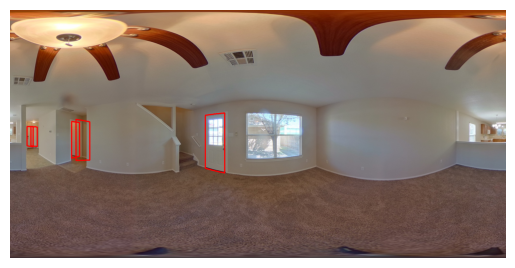

In [2]:
import cv2
import matplotlib.pyplot as plt
import os 
import json
#import sys
#sys.path.append('../')
from  PE_helper import *
from  horizon_utlis import *

detr_path = os.path.join( os.getcwd() ,"output_log", "detr_out.json")
naive_path = os.path.join( os.getcwd(),"output_log", "naive_out.json")
r0_path = os.path.join( os.getcwd() ,"output_log", "out_r0.json")
r29_path = os.path.join( os.getcwd() ,"output_log", "out_r29.json")
r100_path = os.path.join( os.getcwd() ,"output_log", "out_r100.json")

with open(detr_path) as f:
	detr_result = json.load(f)		
	detr_result = sorted(detr_result , key=lambda x :x['img'])
	

with open(naive_path) as f:
	naive_result = json.load(f)
	naive_result = sorted(naive_result , key=lambda x :x['img'])

with open(r0_path) as f:
	r0_result = json.load(f)
	r0_result = sorted(r0_result , key=lambda x :x['img'])

with open(r29_path) as f:
	r29_result = json.load(f)
	r29_result = sorted(r29_result , key=lambda x :x['img'])

with open(r100_path) as f:
	r100_result = json.load(f)
	r100_result = sorted(r100_result , key=lambda x :x['img'])

def draw_dict(img, data_dict , color , draw_gt = False):
	if(draw_gt):
		us = data_dict['gt_us']
		tops = data_dict['gt_tops']
		btms = data_dict['gt_btms']
	else:
		us = data_dict['pred_us']
		tops = data_dict['pred_tops']
		btms = data_dict['pred_btms']

	for u , vt,vb in zip( us , tops , btms):                                            
		polys , img  = to_distorted_box(u,vt,vb , return_mask= False ,
		#polys   = to_distorted_box(u,vt,vb , return_mask= False ,										
										image= img,
										#seg_count=30 , show_plt=False , return_img=False , fill_color=(255,0,0))
										seg_count=30 , show_plt= False , return_img=True , fill_color= color )
		
	return img
		

for detr_log , nav_log , r0_log , r29_log , r100_log in zip( detr_result , naive_result , r0_result , r29_result , r100_result):
	img_path = 	os.path.join("D:\Projects\Door_Detection\data\data" , detr_log['img'])

	img = cv2.imread(img_path)
	
	#img = draw_dict(img ,detr_log , (255,0,0)) # blue
	
	img = draw_dict(img ,nav_log , (0,0,255)) # green
	
	#img = draw_dict(img ,r0_log , (255,255,0)) # light blue
	
	#img = draw_dict(img ,r29_log , (0,255,255)) # yellow
	#img = draw_dict(img ,r100_log , (255,0,255)) # purple
	#img = draw_dict(img ,r100_log , (0,255,0)) # purple
	#img = draw_dict(img ,detr_log , (0,255,0) , draw_gt= True) # red

	img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB )
	plt.imshow(img)
	plt.axis("off")
	plt.show()
	#debug_img = np.ascontiguousarray( img.permute(1,2,0).detach().cpu().numpy())
	#break
	pass
